# <center><span style="color:red;"> <b> Data Science Job Salaries </b></span></center>
# <center><span style="color:red;"> <b> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА </b></span></center>

<p align="center">
    <strong> </strong> <a href="https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries"> Kaggle - Dataset Link</a>
</p>

## <center><span style="text-decoration: underline;">Exploratory Data Analysis (EDA)</span></center>

<h4 style="margin-bottom: 0;">📝 Dataset Description: Data Science Job Salaries </h4>

- **`work_year`**: The year the salary was paid.

- **`experience_level`**: The experience level in the job during the year:
  - **EN**: Entry-level / Junior
  - **MI**: Mid-level / Intermediate
  - **SE**: Senior-level / Expert
  - **EX**: Executive-level / Director

- **`employment_type`**: The type of employment for the role:
  - **PT**: Part-time
  - **FT**: Full-time
  - **CT**: Contract
  - **FL**: Freelance

- **`job_title`**: The role worked in during the year.

- **`salary`**: The total gross salary amount paid.

- **`salary_currency`**: The currency of the salary paid, represented as an ISO 4217 currency code.

- **`salary_in_usd`**: The salary converted to USD using the average exchange rate for the respective year (via [fxdata.foorilla.com](https://fxdata.foorilla.com)).

- **`employee_residence`**: The primary country of residence of the employee during the work year (ISO 3166 country code).

- **`remote_ratio`**: The overall amount of work done remotely:
  - **0**: No remote work (less than 20%)
  - **50**: Partially remote
  - **100**: Fully remote (more than 80%)

- **`company_location`**: The country of the employer's main office or contracting branch (ISO 3166 country code).

- **`company_size`**: The average number of employees at the company during the year:
  - **S**: Less than 50 employees (*small*)
  - **M**: 50 to 250 employees (*medium*)
  - **L**: More than 250 employees (*large*)

<h2 style='background:rgb(167, 162, 157); border-radius: 10px; color: black;\'><center>Table of Content </center></h2>


* [Import Libraries](#chapter1)
* [Initialize Functions](#chapter2)
* [Descriptive Statistics](#chapter3)
* [Feature Engineering](#chapter4)
* [One Way Anova](#chapter5)
* [Two Way Anova](#chapter6)
* [Conclusions](#chapter7)
* [Another Cell](#another_cell)
* [Another Cell 2](#Prepare-Functions-for-Statistical-Analysis)
* [4.2 Backslash Escape](#z)

<a id="chapter1"></a>
### ⚙️ Download Libraries 

In [191]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from IPython.display import display
import category_encoders as ce
from nltk.stem import SnowballStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Choose the template for your figures
sns.set_theme("notebook") 
sns.set_palette("Set3") 

<a id="chapter2"></a>
### 🔬 Prepare Functions for Statistical Analysis 

In [2]:
# Set significance level
alpha = 0.05

# Function to print whether the data is normaly distributed
def normality_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0 - the data is not normally distributed.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0 - the data is normally distributed.'
        
# Function to print the output of tested hypothesis
def hypothesis_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0.'

<a id="chapter3"></a>
### ✨ Some preliminary descriptive analysis 

In [204]:
# Upload Dataset
raw_data = pd.read_csv('data/salary.zip')
print('Beginning of the dataset:')
display(raw_data.head(2))
print('End of the dataset:')
display(raw_data.head(2))
print("Number of variables:", raw_data.shape[1])
print('Number of observations:', raw_data.shape[0])

Beginning of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


End of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Number of variables: 12
Number of observations: 607


In [140]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


 - Data types are as expected.

In [5]:
# Check for missing values
print(raw_data.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


- There are **no** missing values

In [6]:
print(f'Number of duplicates: {raw_data[raw_data.duplicated()].shape[0]}')

Number of duplicates: 0


In [205]:
print('Top 10 Countries with Data Science Jobs info:')
data_iso = raw_data['company_location'].value_counts(normalize=True).sort_values(ascending=False).round(2)[:10].to_frame()
data_iso = data_iso.rename_axis('Country', axis='index')
data_iso.columns = ['Percentage']
display(data_iso)

print('Total number of unique countries in the dataset:', raw_data['company_location'].nunique())

Top 10 Countries with Data Science Jobs info:


,Percentage
Country,
US,0.58
GB,0.08
CA,0.05
DE,0.05
IN,0.04
FR,0.02
ES,0.02
GR,0.02
JP,0.01


Total number of unique countries in the dataset: 50


In [155]:
print('Top 10 Data Science job titles:')
data_ds = raw_data['job_title'].value_counts(normalize=True).sort_values(ascending=False).round(2)[:10].to_frame()
data_ds = data_ds.rename_axis('Title', axis='index')
data_ds.columns = ['Percentage']
display(data_ds)

print('Total number of unique job titles:', raw_data['job_title'].nunique())

Top 10 Data Science job titles:


,Percentage
Title,
Data Scientist,0.24
Data Engineer,0.22
Data Analyst,0.16
Machine Learning Engineer,0.07
Research Scientist,0.03
Data Science Manager,0.02
Data Architect,0.02
Big Data Engineer,0.01
Machine Learning Scientist,0.01


Total number of unique job titles: 50


In [156]:
# Drop not important variables 
raw_data = raw_data.drop(['Unnamed: 0'], axis = 1) 
raw_data.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


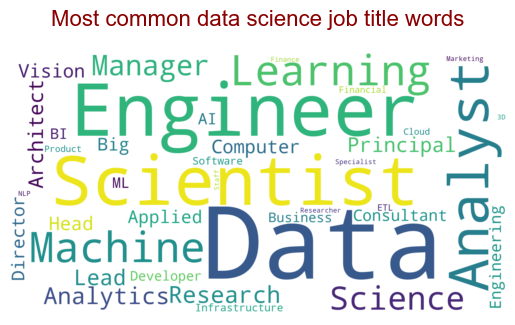

In [206]:
ds_title = " ".join(title for title in raw_data.job_title)
word_cloud_ds = WordCloud(collocations = False, 
                          background_color = 'white',
                          colormap='viridis',
                          width = 2048, 
                          height = 1080,
                          contour_color='black').generate(ds_title)
# saving the image
word_cloud_ds.to_file('images/word_cloud.png')

plt.imshow(word_cloud_ds, interpolation='bilinear')
plt.axis("off")
plt.title(
    "Most common data science job title words",  
    fontsize=16,                         
    color='darkred',                         
    pad=20     # Padding between title and the plot
)
plt.show()

<a id="chapter4"></a>  
### 🧐 Feature Engineering 

In [207]:
# Encode 'company_size' variable
ord_encode = ce.OrdinalEncoder(mapping= [{
    'col' : 'company_size',
    'mapping' : {'S': 1, 'M':2, 'L':3}
}])
data_bin = ord_encode.fit_transform(raw_data['company_size'])
raw_data['company_size_enc'] = data_bin['company_size']

# Encode 'experience_level' variable
ord_encode = ce.OrdinalEncoder(mapping=[{
    'col': 'experience_level',
    'mapping': {'EN':1, 'MI':2, 'SE':3, 'EX':4}
}])
data_bin = ord_encode.fit_transform(raw_data['experience_level'])
raw_data['exper_level_enc'] = data_bin['experience_level']

# Generate dummies for employment type (there is no clear ordering of this variable)
encoder = ce.OneHotEncoder('employment_type', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['employment_type'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

In [209]:
# Convert country codes to continents
def country_to_continent(country_code):
    continent_code = {
    'Africa': [
        'DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD',
        'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'CI', 'KE', 'LS',
        'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RW',
        'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG',
        'EH', 'ZM', 'ZW'
    ],
    'Asia': [
        'AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID',
        'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN',
        'MM', 'NP', 'KP', 'OM', 'PK', 'PH', 'QA', 'SA', 'SG', 'KR', 'LK', 'SY', 'TJ',
        'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE'
    ],
    'Europe': [
        'AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI',
        'FR', 'GE', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'KZ', 'LV', 'LI', 'LT', 'LU',
        'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS',
        'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    ],
    'North America': [
        'AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'DM', 'DO', 'SV', 'GD', 'GT', 'HT',
        'HN', 'JM', 'MX', 'NI', 'PA', 'KN', 'LC', 'VC', 'TT', 'US'
    ],
    'South America': [
        'AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE'
    ],
    'Oceania': [
        'AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU',
        'MP', 'PW', 'PG', 'WS', 'SB', 'TK', 'TO', 'TV', 'VU', 'WF'
    ],
    'Antarctica': [
        'AQ', 'BV', 'TF', 'HM', 'GS'
    ]
}
    for key, value in continent_code.items():
        country_code = country_code.strip()
        if country_code in value:
            return key
    else: 
        return 'Unknown'
    
raw_data['continent_comp'] = raw_data['company_location'].apply(country_to_continent)
raw_data['continent_employ'] = raw_data['company_location'].apply(country_to_continent)

In [210]:
# Generate Dummies for continents of companies and employee residences
encode = ce.OneHotEncoder('continent_comp', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['continent_comp'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

encode = ce.OneHotEncoder('continent_employ', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['continent_employ'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

In [211]:
# Segregate job titles into Data Scientist, Analyst and Engineer
# Initialize the stemmer
stemmer = SnowballStemmer(language="english")

def categ_job_title(title):
    title_lower = title.lower()
    stemmed_title = ' '.join([stemmer.stem(word) for word in title_lower.split()]) 
    
    if 'scientist' in stemmed_title or 'scienc' in stemmed_title:
        return 'Data Scientist'
    elif 'analyst' in stemmed_title or 'analysi' in stemmed_title or 'analyt' in stemmed_title:
        return 'Data Analyst'
    elif 'engineer' in stemmed_title or 'engin' in stemmed_title:
        return 'Data Engineer'
    else:
        return 'Other'

raw_data['job_category'] = raw_data['job_title'].apply(categ_job_title)
job_category = raw_data['job_category'].value_counts(normalize=True).to_frame()
job_category = job_category.rename_axis('Job Category', axis = 'index')
job_category.columns = ['Percentage']
display(job_category)

# Encode the variable
encode = ce.OneHotEncoder('job_category', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['job_category'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

,Percentage
Job Category,
Data Scientist,0.373970
Data Engineer,0.360791
Data Analyst,0.222405
Other,0.042834


In [212]:
# Let's create correlation matrix 
def combined_heatmap_corr(data, list_columns, title=None):
    # Calculate the Pearson and Spearman correlation matrices
    correlation_pearson = data[list_columns].corr(numeric_only=True, method='pearson')
    correlation_spearman = data[list_columns].corr(numeric_only=True, method='spearman')

    # Create a mask for the upper triangle (for Pearson)
    mask_upper = np.triu(np.ones_like(correlation_pearson, dtype=bool))
    
    # Create a mask for the lower triangle (for Spearman)
    mask_lower = np.tril(np.ones_like(correlation_spearman , dtype=bool))

    # Plotting the heatmap
    plt.figure(figsize=(16, 8))
    
    # Plot the Pearson correlation in the upper triangle
    sns.heatmap(
        correlation_pearson,
        mask=mask_upper,  # Mask lower triangle for Pearson
        vmin=-1, # sets the minimum data value that corresponds to the lowest color in the colormap
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True
    )

    # Plot the Spearman correlation in the lower triangle
    sns.heatmap(
        correlation_spearman,
        mask=mask_lower,  # Mask upper triangle for Spearman
        vmin=-1,
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True,
        cbar=False  # Disable color bar for second plot to avoid overlap
    )

    # Fill the diagonal with 1s
    for i in range(len(correlation_pearson)):
        plt.text(i + 0.5, i + 0.5, '1.00', ha='center', va='center', color='black', fontsize=10) # `ha`(`va`) text will be centered horizontally (vertically) at the specified x (y) - coordinate

    plt.title(title, fontsize=15, pad = 15) # pad defines the distance between the title and the graph
    plt.text(0.0, -0.30, '* Pearson (Spearman) bottom (upper) left (right) corner', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=7) 
    plt.show()

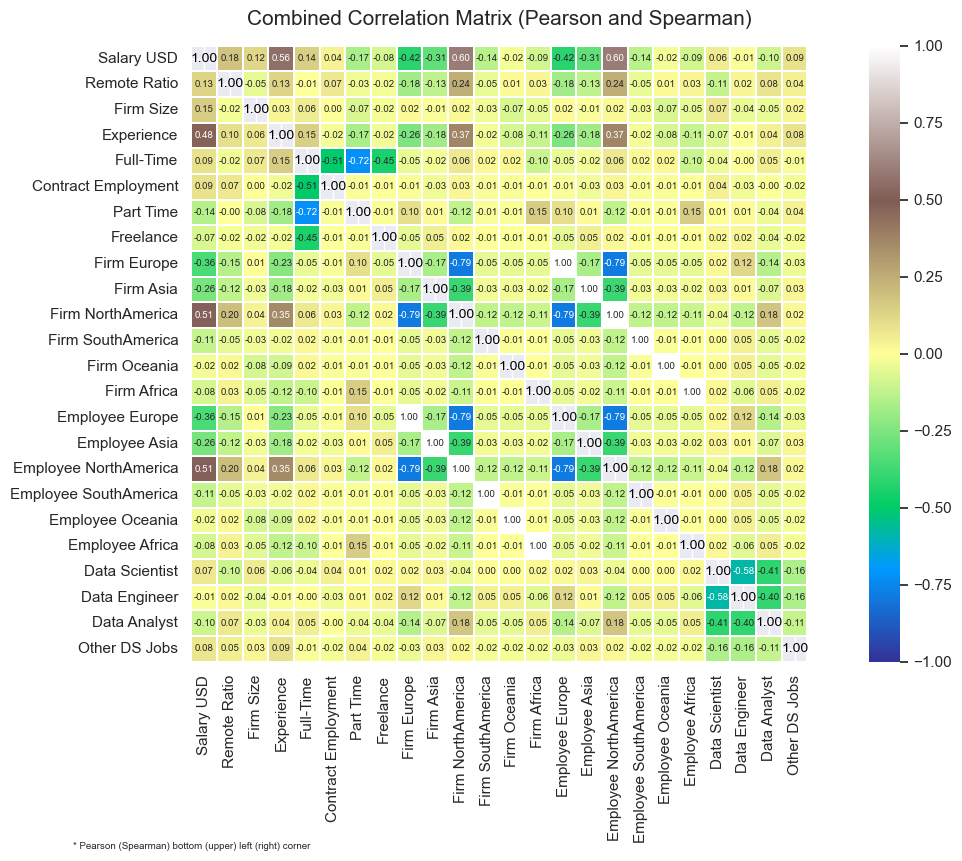

In [213]:
columns_dic={
        'salary_in_usd': 'Salary USD',
        'remote_ratio': 'Remote Ratio',
        'company_size_enc': 'Firm Size',
        'exper_level_enc': 'Experience',
        'employment_type_FT': 'Full-Time',
        'employment_type_CT': 'Contract Employment',
        'employment_type_PT': 'Part Time',
        'employment_type_FL': 'Freelance',
        'continent_comp_Europe': 'Firm Europe',
        'continent_comp_Asia': 'Firm Asia',
        'continent_comp_North America': 'Firm NorthAmerica',
        'continent_comp_South America': 'Firm SouthAmerica',
        'continent_comp_Oceania': 'Firm Oceania',
        'continent_comp_Africa': 'Firm Africa',
        'continent_employ_Europe': 'Employee Europe',
        'continent_employ_Asia': 'Employee Asia',
        'continent_employ_North America': 'Employee NorthAmerica',
        'continent_employ_South America': 'Employee SouthAmerica',
        'continent_employ_Oceania': 'Employee Oceania',
        'continent_employ_Africa': 'Employee Africa', 
        'job_category_Data Scientist': 'Data Scientist', 
        'job_category_Data Engineer': 'Data Engineer', 
        'job_category_Data Analyst': 'Data Analyst', 
        'job_category_Other': 'Other DS Jobs',        
        }
data_temp = raw_data.rename(columns=columns_dic)
lst_vars = [val for val in columns_dic.values()]
combined_heatmap_corr(
    data=data_temp,
    list_columns = lst_vars,
    title='Combined Correlation Matrix (Pearson and Spearman)'
)

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4> 
<p>
- <i> The table above presents the correlation matrix, showing Pearson correlations (bottom left) and Spearman correlations (upper right). Our main variable of interest is <code>salary</code>.</i>
</p>
<p>
- The Pearson correlation indicates an average positive correlation between employees' experiences (0.49), a dummy variable for a firm's location in North America (0.51), a dummy variable for an employee's residence in North America (0.51), and salary. However, these correlations slightly increase when using the Spearman correlation. It is important to check for the normality and linearity of the relationships before determining which type of correlation to use.
</p>
<p>
- Interestingly, there is a very weak correlation between the degree of remote work ("Remote Ratio"), firm size ("Firm Size"), and salary. Additionally, there is either weak or very weak negative correlation between employees' residences or company locations and salary across all continents except North America.
</p>
<p>
- Aditionally, there is a very weak correlation between the types of the data science titles (Analyst, Engineer, Scientist or Others) and salary. 
</p>

---

<a id="chapter4"></a>
### 📈 Graphical Analysis + Statistical Analysis 

<a id="chapter4a"></a>
#### A) Data Scientists' Salary

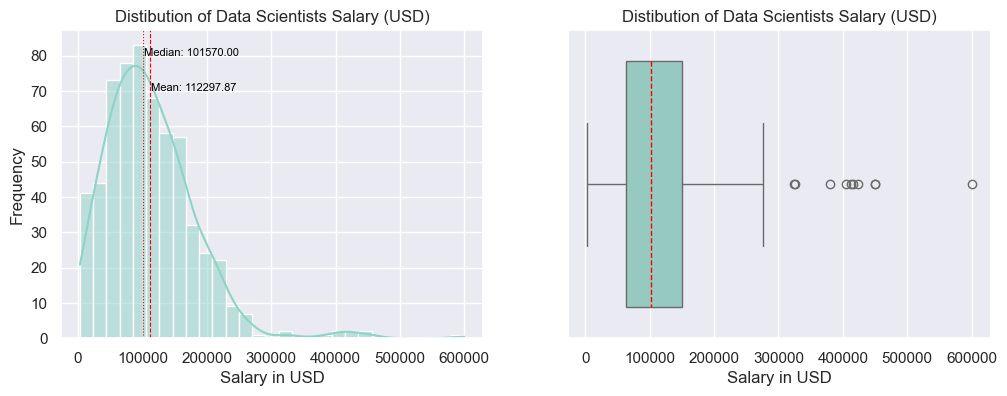

In [214]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(raw_data['salary_in_usd'], kde=True, ax = axes[0])
axes[0].set(xlabel='Salary in USD', ylabel = 'Frequency')
axes[0].set_title('Distibution of Data Scientists Salary (USD)')
axes[0].axvline(raw_data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
mean_value = raw_data['salary_in_usd'].mean() # Estimate mean value of salary
axes[0].annotate(f'Mean: {mean_value:.2f}',
                 xy=(raw_data['salary_in_usd'].mean(), 0),
                 xytext=(mean_value + 500, 70),
                 fontsize=8, color='black')
axes[0].axvline(raw_data['salary_in_usd'].median(), color='red', linestyle=':', linewidth=0.8)
median_value = raw_data['salary_in_usd'].median() # Calculate the median
axes[0].annotate(f'Median: {median_value:.2f}',
                 xy=(raw_data['salary_in_usd'].median(), 0),
                 xytext=(median_value + 500, 80),
                 fontsize=8, color='black')

sns.boxplot(raw_data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Salary in USD')
axes[1].set_title('Distibution of Data Scientists Salary (USD)')
plt.show()

- Let's see some descriptive statistics:

In [215]:
data_salary = raw_data['salary_in_usd'].describe().round(2).to_frame()
data_salary.columns = ['salary_in_usd']
display(data_salary)

,salary_in_usd
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- Data Science salaries are right-skewed, with a median value of 101,570.0 and a mean value of 112,297.87 (The data is not normally distributed). </p>
<p>
- The boxplot indicates the presence of some outliers.
</p>
<p>
- The minimum (maximum) salary is 2,859 (600,000). The minimum salary likely corresponds to a freelance project or part-time job.
</p>
<p>
- Notably, the standard deviation is very high - 70,957.26 - indicating significant variation in salaries among data scientists.
</p>

---

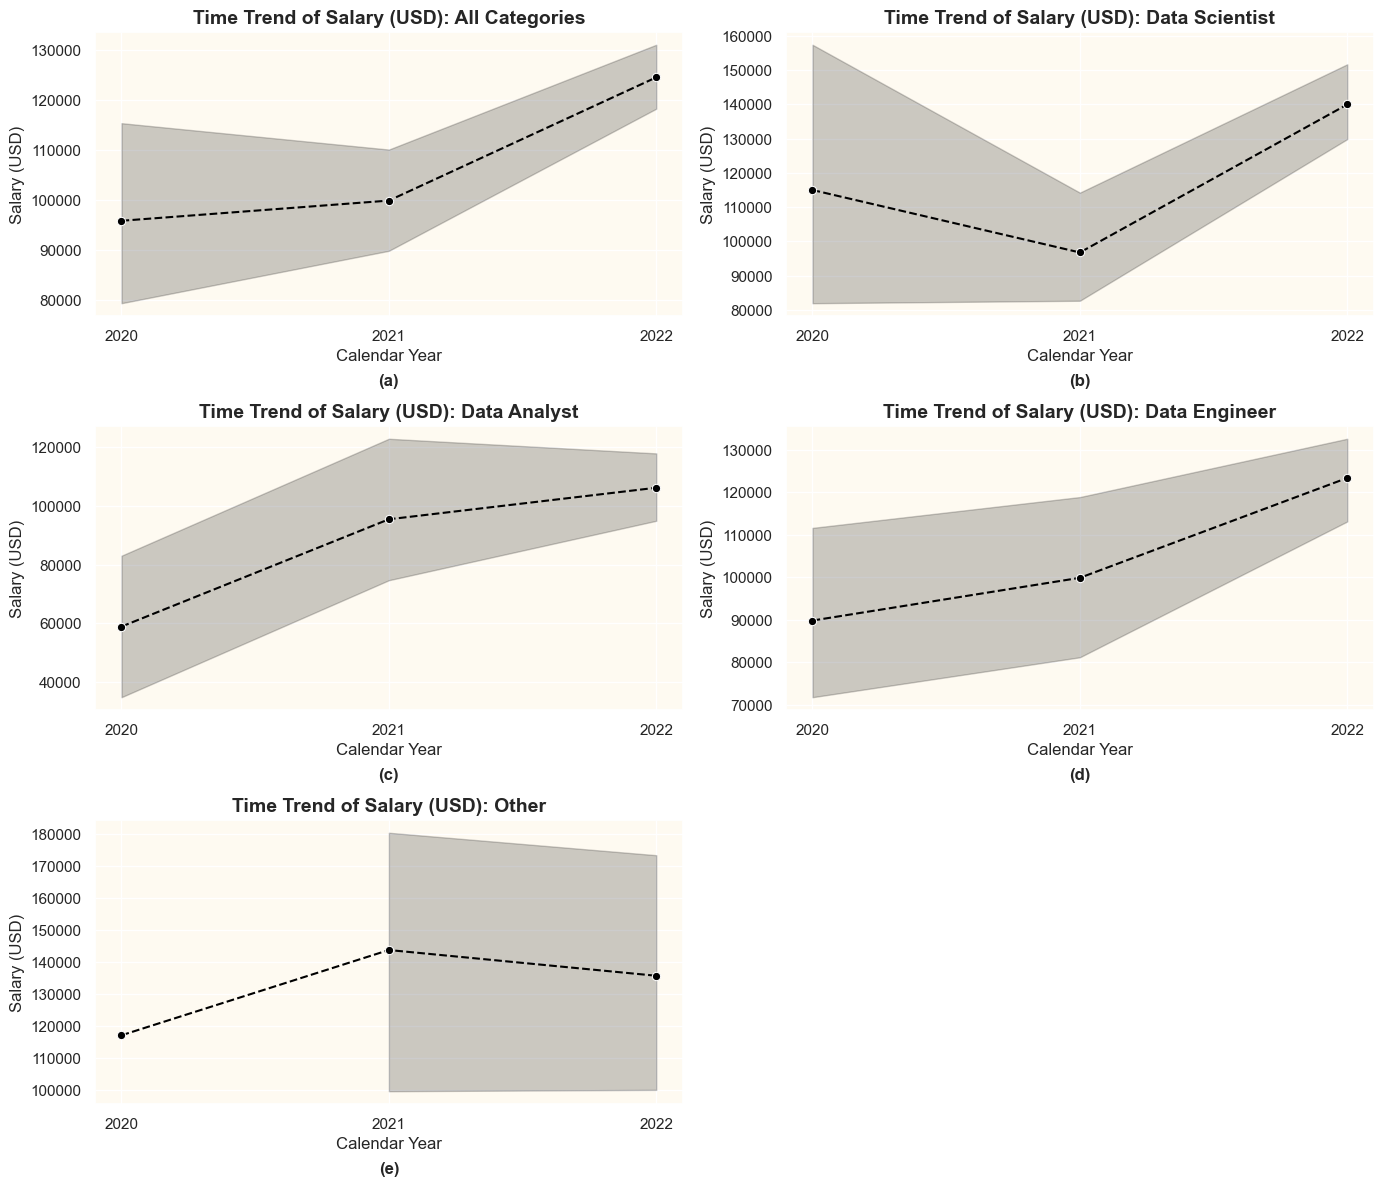

In [216]:
# Define the job categories
categories = ['All', 'Data Scientist', 'Data Analyst', 'Data Engineer', 'Other']

# Create a 3x2 grid (6 total subplots, one will remain empty)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Panel labels
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '']

# Loop through the categories and plot in the appropriate subplot
for idx, category in enumerate(categories):
    if category == 'All':
        category_data = raw_data  # Use all data for the first graph
    else:
        category_data = raw_data[raw_data['job_category'] == category]  # Filter by category

    # Extract salary and year data
    salary_time = category_data[['salary_in_usd', 'work_year']].sort_values(by='work_year')

    # Plot on the specific axis
    sns.lineplot(
        data=salary_time,
        x='work_year',
        y='salary_in_usd',
        marker='o',
        linestyle='--',
        color='Black',
        markersize=6,
        errorbar=('ci', 95),
        ax=axes[idx]  # Use the correct subplot
    )

    # Set titles and labels
    title = f'Time Trend of Salary (USD): {category}' if category != 'All' else 'Time Trend of Salary (USD): All Categories'
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Calendar Year')
    axes[idx].set_ylabel('Salary (USD)')
    axes[idx].set_xticks([2020, 2021, 2022])
    axes[idx].set_xticklabels(['2020', '2021', '2022'])
    axes[idx].set_facecolor("#fefaf1")
    axes[idx].grid(True, linestyle='-', color='white')

    # Add panel labels below the subplot and center them
    axes[idx].annotate(
        panel_labels[idx],  # Label text
        xy=(0.5, -0.2),  # Coordinates relative to the axis (centered below)
        xycoords='axes fraction',
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='top'
    )

# Remove the 6th subplot (leave it empty)
fig.delaxes(axes[-1])  # Delete the last subplot (axes[5])

# Adjust layout for spacing
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>

<p>
- There is an increasing trend in overall data scientists' salaries over time (Panel A). Notably, the average salary increased significantly between 2021 and 2022.
</p>
<p>
- The average salaries of Data Scientists, Data Engineers and Data Analysts increased significantly between 2021 and 2022. However, for Data Scientists, the average salary first decreased from 2020 to 2021 and then increased between 2021 and 2022.
</p>
<p>
- Interestingly, the category that does not fall into Data Scientist, Analyst, or Engineer (i.e., "Others") experienced a decrease in average salary between 2021 and 2022.
</p>
<p>
- Let's check what kinds of job titles fall into the "Other" category.
</p>

---

In [217]:
other_category = raw_data[raw_data['job_category'] == 'Other']['job_title'].value_counts(normalize=True)[:20].to_frame()
other_category = other_category.rename_axis('Job Title', axis = 'index')
other_category.columns = ['Percentage']
display(other_category)


,Percentage
Job Title,
Data Architect,0.423077
Head of Data,0.192308
Machine Learning Developer,0.115385
ETL Developer,0.076923
Machine Learning Manager,0.038462
3D Computer Vision Researcher,0.038462
Data Specialist,0.038462
Big Data Architect,0.038462
Head of Machine Learning,0.038462


<a id="chapter4b"></a>
#### B) Potential Determinants of Data Scientists' Salaries

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on an individuals' gender </h4>

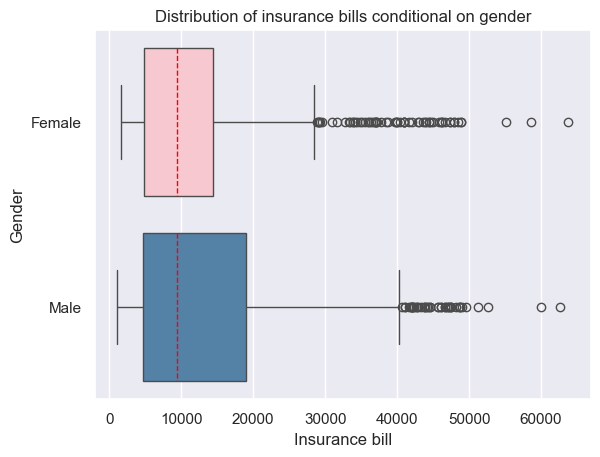

In [52]:
ax = sns.boxplot(data, x = 'charges', y='sex', orient='h', 
                 hue = 'sex', palette={'male': 'steelblue', 'female': 'pink'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_yticklabels(['Female', 'Male'])
ax.set_title('Distribution of insurance bills conditional on gender')
ax.set(xlabel = 'Insurance bill', ylabel = 'Gender')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- <strong>Graphical Analysis:</strong> Based on the visual representation, we cannot definitively conclude whether there is a significant difference in insurance bills (median) between males and females. </p>
<p>
- <strong>Notable Observations:</strong> Males exhibit a higher interquartile range (IQR) of insurance bills and a higher fourth quartile. These observations may provide an initial expectation of a potential statistically significant difference between male and female insurance bills.
</p>
- Let's examine some further descriptive statistics:

---

In [53]:
data_group_sex = data.groupby('sex')['charges'].describe().round(2)
display(data_group_sex)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.58,11128.70,1607.51,4885.16,9412.96,14454.69,63770.43
male,675.0,13975.00,12971.96,1121.87,4654.02,9377.90,19006.69,62592.87


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The average value of males' insurance bills is higher than that of females. Additionally, both distributions are right-skewed.  </p>
<p>
- <strong>Important:</strong> The maximum value of female insurance bills is higher than that of males, potentially indicating the presence of more significant outliers in the female group.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between males ($μ_1$) and females ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [54]:
# Test whether the data is normally distributed. 
male_bill = data.loc[data['sex'] == 'male', 'charges']
female_bill = data.loc[data['sex'] == 'female', 'charges']

print('Normality test for males:')
_, pval_norm = stats.shapiro(male_bill)
print(normality_test(pval_norm))

print('Normality test for females:')
_, pval_norm = stats.shapiro(female_bill)
print(normality_test(pval_norm))

Normality test for males:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for females:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test  </p>

---

In [55]:
_, pval = stats.mannwhitneyu(male_bill, female_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.35) is greater than the specified significance level 0.05. We fail to reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- There is <b><u>no</u></b> basis to claim that the amount of insurance bills for male clients is higher than for female clients.  
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on whether an individuals is smoking or not </h4>

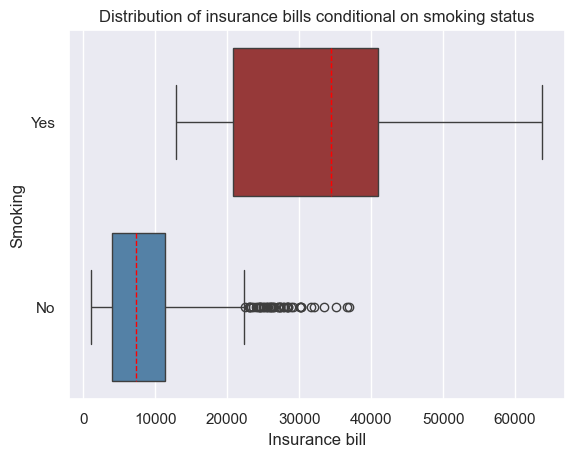

In [56]:
ax = sns.boxplot(data, x = 'charges', y='smoker', orient='h', 
                 hue = 'smoker', palette={'yes': 'brown', 'no': 'steelblue'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1]) 
ax.set_yticklabels(['Yes', 'No'])
ax.set_title('Distribution of insurance bills conditional on smoking status')
ax.set(xlabel = 'Insurance bill', ylabel = 'Smoking')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- Graphical representation clearly indicates that smokers have higher median value of health insurance bills compared to non-smokers. Additionally, there are no outliers in case of smokers.  </p>
<p>
- In case of non-smokers, we can observe that there are some outliers in the data. 
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [57]:
data_group_smoker = data.groupby('smoker')['charges'].describe().round(2)
display(data_group_smoker)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.66,5992.97,1121.87,3988.88,7345.73,11363.02,36910.61
yes,274.0,32050.23,11541.55,12829.46,20826.24,34456.35,41019.21,63770.43


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The average value of smokers' insurance bills is approximately four times higher than that of non-smokers. 
</p>
<p>
- The distribution of insurance bills for non-smokers is right-skewed, whereas for smokers, it is left-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations attributable to smokers is four times lower than that of non-smokers.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between smokers ($μ_1$) and fnonsmokers ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [58]:
# Test whether the data is normally distributed. 
smoker_bill = data.loc[data['smoker'] == 'yes', 'charges']
nonsmoker_bill = data.loc[data['smoker'] == 'no', 'charges']

print('Normality test for smokers:')
_, pval_norm = stats.shapiro(smoker_bill)
print(normality_test(pval_norm))

print('Normality test for nonsmokers:')
_, pval_norm = stats.shapiro(nonsmoker_bill)
print(normality_test(pval_norm))

Normality test for smokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for nonsmokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test  </p>

---

In [59]:
_, pval = stats.mannwhitneyu(smoker_bill, nonsmoker_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The amount of insurance bills for nonsmokers is statistically significant and lower compared to those who smoke.  
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on the region </h4>

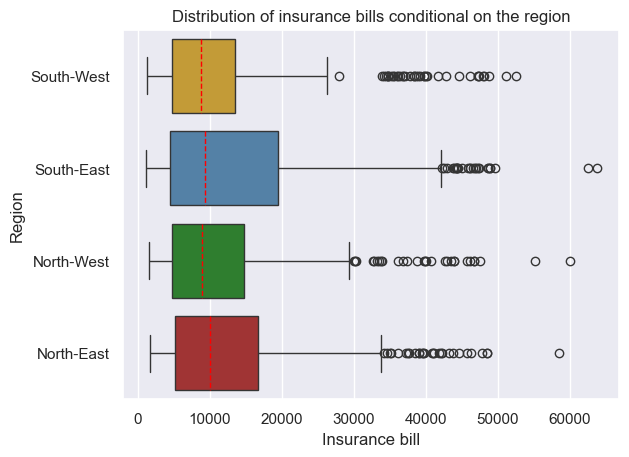

In [60]:
ax = sns.boxplot(data, x = 'charges', y='region', orient='h', 
                 hue = 'region', palette={'southwest': 'goldenrod', 'southeast': 'steelblue', 'northwest': 'forestgreen', 'northeast': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3]) 
ax.set_yticklabels(['South-West', 'South-East', 'North-West', 'North-East'])
ax.set_title('Distribution of insurance bills conditional on the region')
ax.set(xlabel = 'Insurance bill', ylabel = 'Region')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation does not reveal any significant differences in insurance bills across regions, except for some minor variations.
</p>
<p>
- Of note, the South-East region has the highest interquartile range (IQR), while the South-West region has the lowest.
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [61]:
data_group_region = data.groupby('region')['charges'].describe().round(2)
display(data_group_region)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.38,11255.80,1694.80,5194.32,10057.65,16687.36,58571.07
northwest,324.0,12450.84,11073.13,1621.34,4733.64,8976.98,14788.75,60021.40
southeast,364.0,14735.41,13971.10,1121.87,4440.89,9294.13,19526.29,63770.43
southwest,325.0,12346.94,11557.18,1241.56,4751.07,8798.59,13462.52,52590.83


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- There is no significant difference in the mean values of insurance bills across regions. The highest mean value is observed in the South-East region, while the lowest is in the North-West.
</p>
<p>
- The distributions of insurance bills across regions are right-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations within the regions is approximately equal.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different regions: Northeast ($μ_1$), Southeast ($μ_2$), Southwest ($μ_3$), Northwest ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [62]:
northeast_bill = data.loc[data['region']=='northeast', 'charges']
northwest_bill = data.loc[data['region']=='northwest', 'charges']
southeast_bill = data.loc[data['region']=='southeast', 'charges']
southwest_bill = data.loc[data['region']=='southwest', 'charges']

# Tests of normality
print('Normality - North East region:')
_, pval = stats.shapiro(northeast_bill)
print(normality_test(pval))

print('Normality - North West region:')
_, pval = stats.shapiro(northwest_bill)
print(normality_test(pval))

print('Normality - South East region:')
_, pval = stats.shapiro(southeast_bill)
print(normality_test(pval))

print('Normality - South West region:')
_, pval = stats.shapiro(southwest_bill)
print(normality_test(pval))

Normality - North East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - North West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test  </p>

---

In [63]:
_, pval = stats.kruskal(northeast_bill, northwest_bill, southeast_bill, southwest_bill)
print(hypothesis_test(pval))

The p-value (0.20) is greater than the specified significance level 0.05. We fail to reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We fail to reject H0: There are no statistically significant differences in insurance bills across regions.
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on age group </h4>

In [64]:
# Generate new variable that splits the age into subgroups
"""
    18–27: Young Adults (below 25th percentile)
    28–39: Early Middle Age (25th to 50th percentile)
    40–51: Late Middle Age (50th to 75th percentile)
    52–64: Seniors (above 75th percentile)
"""
# right = False - ensures that the intervals are as follows [a, b)    
data['AgeBins'] = pd.cut(data['age'], 
                         bins=[18, 28, 40, 52, 65], 
                         labels=['YoungAdult', 'EarlyMiddleAge', 'LateMiddleAge', 'Seniors'], 
                         right = False)    

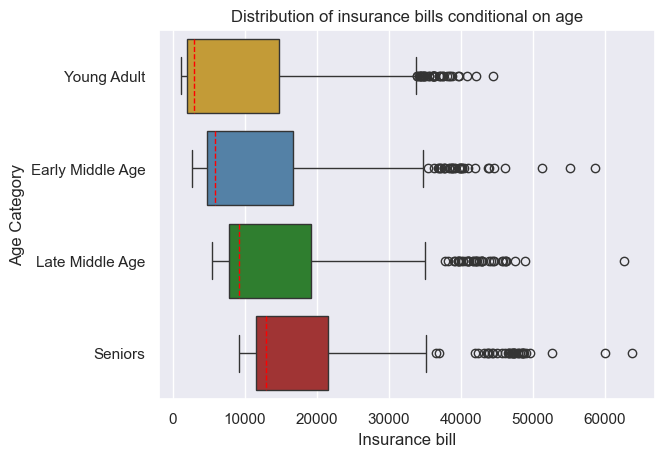

In [65]:
ax = sns.boxplot(data, x = 'charges', y='AgeBins', orient='h', 
                 hue = 'AgeBins', palette={'YoungAdult': 'goldenrod', 'EarlyMiddleAge': 'steelblue', 'LateMiddleAge': 'forestgreen', 'Seniors': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set_title('Distribution of insurance bills conditional on age')
ax.set(xlabel = 'Insurance bill', ylabel = 'Age Category')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates a clear trend of increasing health insurance bills with age
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [66]:
data_group_age = data.groupby('AgeBins', observed=False)['charges'].describe().round(2)
display(data_group_age)

,count,mean,std,min,25%,50%,75%,max
AgeBins,,,,,,,,
YoungAdult,361.0,9118.85,11558.22,1121.87,1986.93,2897.32,14711.74,44501.40
EarlyMiddleAge,312.0,11385.96,11659.54,2689.50,4662.40,5796.97,16687.36,58571.07
LateMiddleAge,337.0,14618.37,11651.65,5415.66,7740.34,9095.07,19144.58,62592.87
Seniors,327.0,18298.07,11583.67,9140.95,11523.64,12979.36,21496.41,63770.43


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- With age, the mean value of health-related insurance bills increases.
</p>
<p>
- The distributions of insurance bills across age groups are right-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations within the age group is approximately equal.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different age groups: Young Adult ($μ_1$), Early Middle Age ($μ_2$), Late Middle Age ($μ_3$), Seniors ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [67]:
young_bill = data.loc[data['AgeBins']=='YoungAdult', 'charges']
earlymiddle_bill = data.loc[data['AgeBins']=='EarlyMiddleAge', 'charges']
latemiddle_bill = data.loc[data['AgeBins']=='LateMiddleAge', 'charges']
senior_bill = data.loc[data['AgeBins']=='Seniors', 'charges']

# Tests of normality
print('Normality - Young Adults:')
_, pval = stats.shapiro(young_bill)
print(normality_test(pval))

print('Normality - Early Middle Age:')
_, pval = stats.shapiro(earlymiddle_bill)
print(normality_test(pval))

print('Normality - Late Middle Age:')
_, pval = stats.shapiro(latemiddle_bill)
print(normality_test(pval))

print('Normality - Seniors:')
_, pval = stats.shapiro(senior_bill)
print(normality_test(pval))

Normality - Young Adults:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Early Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Late Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Seniors:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test  </p>

---

In [68]:
_, pval = stats.kruskal(young_bill, earlymiddle_bill, latemiddle_bill, senior_bill)
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in insurance bills across age groups!
</p>

---

<h4 style="margin-bottom: 0; color: red; font-weight: bold;">📌 Extra Analysis</h4>

- In this section, I test additional hypotheses:
    - Do we observe a statistically significant difference in smoking behavior within:  
        a. Gender groups  
        b. Age subgroups

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on age group </h4>

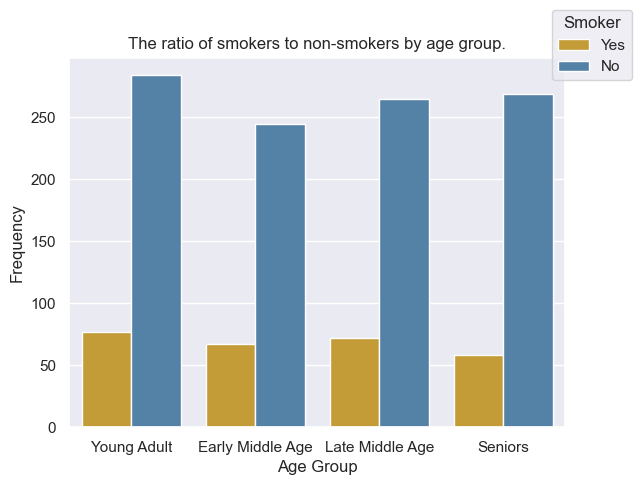

In [69]:
ax = sns.countplot(data=data, x=data['AgeBins'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1, 2, 3])  
ax.set_xticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set(xlabel='Age Group', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by age group.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates no clear difference in smoking behavior across age groups
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

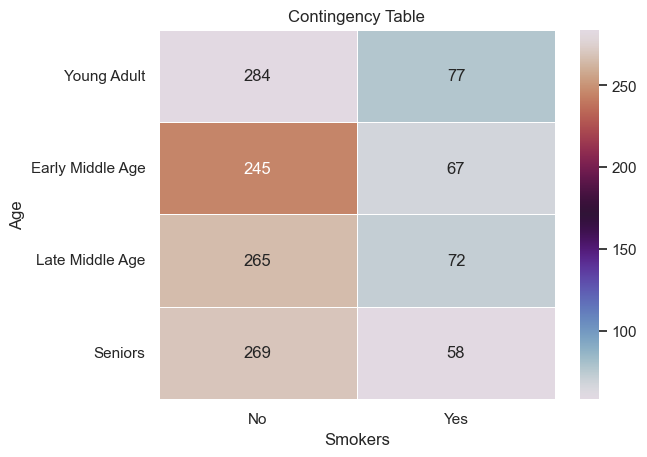

In [70]:
cross_tab = pd.crosstab(index=data['AgeBins'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Age')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5, 2.5, 3.5])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
plt.title('Contingency Table')
plt.show()

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different age groups
**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [71]:
crosstab_tab = pd.crosstab(data['AgeBins'], data['smoker'])
display(crosstab_tab)

smoker,no,yes
AgeBins,,
YoungAdult,284,77
EarlyMiddleAge,245,67
LateMiddleAge,265,72
Seniors,269,58


In [72]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)


'The p-value (0.57) is greater than the specified significance level 0.05. We fail to reject H0.'

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across age groups!
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on gender </h4>

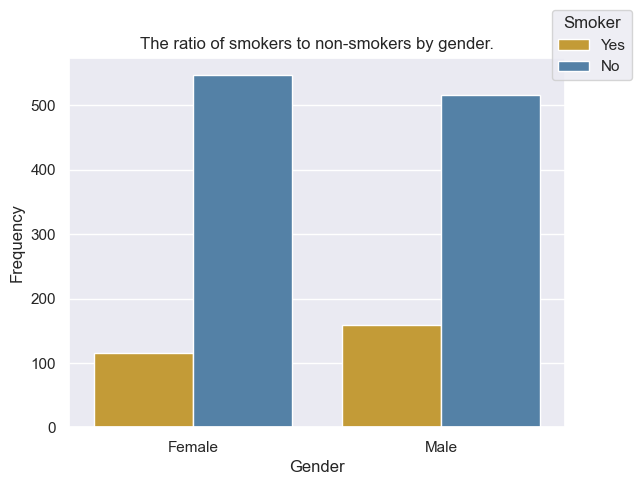

In [73]:
ax = sns.countplot(data=data, x=data['sex'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_xticklabels(['Female', 'Male'])
ax.set(xlabel='Gender', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by gender.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We can see that there are more males who smoke compared to females. Additionally, it can be inferred that the ratio of smoking males to non-smoking males is higher than the ratio of smoking females to non-smoking females.
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

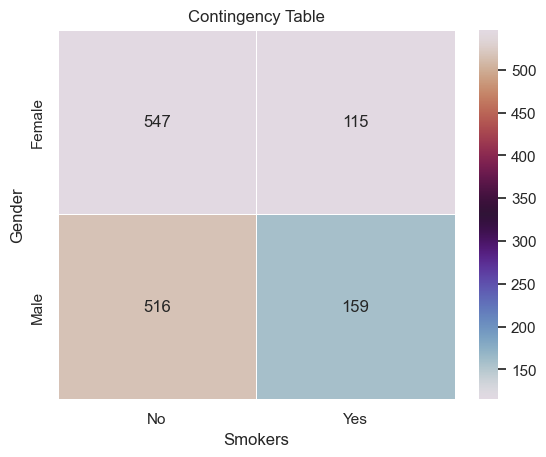

In [74]:
cross_tab = pd.crosstab(index=data['sex'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidths=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Gender')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5])  
ax.set_yticklabels(['Female', 'Male'])
plt.title('Contingency Table')
plt.show()



<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different gender groups
**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [75]:
crosstab_tab = pd.crosstab(data['sex'], data['smoker'])
display(crosstab_tab)

smoker,no,yes
sex,,
female,547,115
male,516,159


In [76]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)

'The p-value (0.01) is less than the specified significance level 0.05. We reject H0.'

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across gender groups!
</p>

---
---

## <center><span style="color:red;"> <b> 🚨 Conclusions of EDA </b></span><center>

* There is no evidence to suggest that there is a difference in the amount of insurance bills paid by male vs female clients.
* The amount of insurance bills for non-smoking clients is lower than for smoking clients.
* There is no evidence to suggest that there is a difference in the amount of insurance bills across different regions.
* There is evidence to suggest that there is a difference in the amount of insurance bills across different age groups.

* **Extra Analysis:**
    * There is an association between age group and smoking status.
    * There is an association between gender and smoking status.